# The MD simulation of the folding of the ALA12 peptide

## 1. import the module we need

In [16]:
import mindsponge.toolkits as Xponge
from mindsponge.toolkits.mdrun import run
from mindsponge.toolkits.analysis import MdoutReader
Xponge.source("mindsponge.toolkits.forcefield.amber.ff19sb")
gb = Xponge.source("mindsponge.toolkits.forcefield.special.gb")

## 2. get a Molecule instance

In [17]:
mol = NALA + ALA * 10 + CALA

## 3. set the gb parameters

In [18]:
gb.Set_GB_Radius(mol)

Reference for modified Bondi radii:
    Vickie Tsui, David A. Case
    Theory and Applications of the Generalized Born Solvation Model in Macromolecular Simulations
    Biopolymers 2001 56 (4) 275-291
    DOI: 10.1002/1097-0282(2000)56:4<275::AID-BIP10024>3.0.CO;2-E



## 4. save the input

In [19]:
Save_PDB(mol, "ALA.pdb")
Save_SPONGE_Input(mol, "ALA")

## 5. do the molecular dynamics simulation

In [10]:
run("""SPONGE_NOPBC
-mode NVT
-dt 2e-3 
-constrain_mode SHAKE
-step_limit 5000000
-thermostat middle_langevin
-default_in_file_prefix ALA
""")

SPONGE Version:
    v1.2.6.0 2022-08-01

Citation:
    Huang, Y. - P., Xia, Y., Yang, L., Wei, J., Yang, Y.I.and Gao, Y.Q. (2022), SPONGE: A GPU - Accelerated Molecular Dynamics Package with Enhanced Sampling and AI - Driven Algorithms.Chin.J.Chem., 40 : 160 - 168. https ://doi.org/10.1002/cjoc.202100456


MD TASK NAME:
    Default SPONGE MD Task Name

START INITIALIZING CONTROLLER
    Start initializing CUDA
        1 device found:
            Device 0:
                Name: NVIDIA GeForce RTX 2080 SUPER
                Memory: 7.8 GB
        Set Device 0
    End initializing CUDA
    structure last modify date is 20210827
END INITIALIZING CONTROLLER

START INITIALIZING MD CORE:
    Mode set to NVT
    dt set to 0.002000 ps
    Start reading coordinate_in_file:
        atom_numbers is 123
        system start_time is 0.000000
        box_length is
            x: 999.000000
            y: 999.000000
            z: 999.000000
    End reading coordinate_in_file

    Velocity is set to ze

## 6. see the results

You can also download the ALA.pdb and mdcrd.dat to your PC, and use VMD to visualize the trajectory. Here is the movie.
![ala12_folding.gif](../../../docs/ala12_folding.gif)

In [11]:
mdout = MdoutReader("mdout.txt")

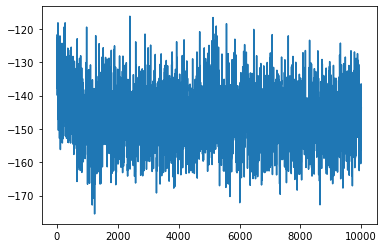

In [12]:
import matplotlib.pyplot as plt
plt.plot(mdout.time, mdout.potential)
plt.show()